# Big Data in Finance: Part IV <BR><BR> Lecture Notes 1: Intro 
    
**Instructor** <BR>
Kirsten Burr, kburr26@gsb.columbia.edu
    
**TA's:** <BR>
Dian Jiao, dj2526@columbia.edu <BR>
Varuun Deshpande, vdeshpande25@gsb.columbia.edu

<sub> Credit: lecture notes originally developed by Lira Mota

# Introduction

## Goal

1. Get familiar with Compustat and CRSP data bases;
2. One application in finance: factor investing.

## Schedule

* Lecture 1: Introduction, CRSP and Compustat basics
* Lecture 2: Application to asset pricing: Factor replication & performance evaluation

## Prerequisites
* Install Anaconda. 
    * It can be downloaded for free at [download Anaconda](https://www.anaconda.com/download/).
    * I am going to be using Python 3.9.13. 
* Working knowledge with Python.
    * I recommend using [JupyterLab](https://jupyter.org/install), [Spyder](https://www.spyder-ide.org/download), or [PyCharm](https://www.jetbrains.com/pycharm/download/#section=windows) as a Python IDE for Python 3. 
        * JupyterLab and Spyder are free to download.
        * PyCharm student and faculty members license are also free, you only need to apply at [PyCharm license](https://www.jetbrains.com/student/). 


* Working knowledge with GIT.
    * All course material will be available in GitHub repository. Access [here](https://github.com/kburr97/big_data2025).
    * Make sure to setup a GitHub account
* WRDS direct connection to Python.
    * WRDS has built a Python module that allows direct download of data sets from WRDS services into Python. This is very convenient and we are going to use this tool in class.
    * In order to use the direct download you need to **setup your WRDS connection beforehand** by following the instructions [here](https://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/python-from-your-computer/).


## Homework

* There will be two homeworks.
	* **Due Thursday 4/3:** Exploring CRSP and Compustat;
	* **Due Thursday 4/10:** Replication exercise of Fama and French (2015) five factors (MktRF, SMB, HML, RMW, CMA) and Momentum.
* I will provide skeleton .py codes and you should develop your code filling the gaps of the code structure. 
* Reach out to TAs for instructions on how to upload.

# What is Factor Investing?

## Multifactor Asset Pricing Models

* Factor models are the most commonly used financial models used in empirical finance.
* These models seek to explain equilibrium asset prices by identifying the investment characteristics that influence the risks and returns of stocks and portfolios.
* The CAPM was the first pricing model to come out of modern finance and is the simplest version of a factor model:
$$E[R_{t+1}^i] = {R_{t}^f} + {\beta^{mkt} * E[R_{t+1}^{mkt} -R_{t}^f]} $$
where compensation for risk = quantity of risk + market price per unit of risk (i.e. risk premium).

* The CAPM is based on the theoretical predictions made by the capital market line and security market line:
$$E[R^i_{t+1}-R_t^f] = \beta^{mkt} E[R_{t+1}^{mkt}-R_t^f]$$ 
where $\beta^{mkt}$ measures the quantity of market risk that stocks have (i.e. how exposed stock returns are to the overall market return movements)

* We can test factor models like the CAPM by regressing excess returns on the set of traded factors to obtain estimates for $\alpha$ and $\beta$:
$$R^i_{t} - R^f_t = \hat \alpha^i + \hat \beta^{mkt} (R^{mkt}_{t} - R^f_t) + \epsilon_{t+1} $$
    * In this regression, $\hat\alpha$ is the abnormal return (i.e. extra compensation that does not stem from risk exposure)
    * The CAPM predicts $\alpha = 0$, but what if the estimated $\hat\alpha \neq 0$? 

* To address model misspecification, we will consider multi-factor models  with 3, 4, 5, etc. factors on the right-hand side.
* For example, the Fama-French 3-factor model (market factor, size factor, value factor) would have:
$$E[R_{t+1}^{i}-R_t^f] = \beta^{mkt} E[R_{t+1}^{mkt}-R_t^f] + \beta^{SMB} E[R_{t+1}^{SMB}-R_t^f] + \beta^{HML} E[R_{t+1}^{HML}-R_t^f]$$
where $R_{t+1}^{SMB}$ and $R_{t+1}^{SMB}$ are the returns on buying a long-short portfolio with exposure to small stocks and value stocks, respectively, and each $\beta$ tells us how sensitive stock returns are to each risk factor.
* We can obtain coeficents estimates of the Fama-French 3-factor model by estimating an expanded version of the Security Characteristic Line: 
$$R_{t}^{i}-R_t^f = \hat \alpha^i +\hat  \beta^{mkt} (R_{t+1}^{mkt}-R_t^f) + \hat \beta^{SMB} (R_{t+1}^{SMB}-R_t^f) +\hat  \beta^{HML} (R_{t}^{HML}-R_t^f) + \epsilon_{t+1} $$



## The Standard in the Literature
* The Fama and French (1993) characteristic sort procedure has become standard for forming **factor-portfolios**
  * That is, find a characteristic that is associated with expected returns, e.g. book-to-market, and create a corresponding factor portfolio by sorting on this characteristic.
  * The resulting factor portfolio goes long high- and short low-characteristic stocks.

* Examples: 
    * Fama and French (2015) - SMB, HML, RMW and CMA; 
    * Carhart (1997) - MOM; 
    * Daniel and Moskowitz (2016) - WML; 
    * Pastor and Stambaugh (2003) - LIQ; 
    * Asness, Frazzini and Pedersen (2013) - QMJ; 
    * Frazzini and Pedersen (2014) - BAB;
    * Lustig, Roussanov and Verdelhan (2011)- Currency markets.
 * These papers usually follow the form:
    1. Show that stocks with high value of x on average outperform stocks with low value of x.
    2. Is it robust? Run a Fama-MacBeth regression;
    3. Is it explained by risk? Form a long-short portfolio based on the new characteristic sort. Test if this portfolio earns an "alpha" with respect the benchmark model.


## How to Construct a "Factor"?
<img src="ff6.png" width="800" height="400">


# What are Compustat and CRSP?

## Compustat Description  


* Compustat is a database of financial, statistical and market information on active and inactive global companies throughout the world. The service began in 1962.
* It is under the umbrella of Standard and Poor's many data sets: Compustat, Capital IQ, etc.
* What is the main use of Compustat data set in Finance? Firms' fundamentals.
    * In the US, all companies that have public traded securities must report accounting information in different formats, e.g., 10-K, 4-K. 
    * Compustat is a compilation of information reported by firms in a standardized way.
    
  Source: [Compustat Website](https://wrds-www.wharton.upenn.edu/documents/841/Understanding_The_Data_57jARh2.pdf)

* **Compustat Xpressfeed** is a data delivery system for Standard & Poor’s Compustat data. 

    As of June 2007, for the **U.S.** and **Canada** publicly-traded companies, Xpressfeed offers:
    * Coverage for over 14,650 active companies and over 16,950 inactive companies
    * Coverage for over 15,700 active securities and over 20,850 inactive securities
    * Company fundamental annual data beginning in 1950
    * Company restated quarterly beginning in 1962
    * Company annual summary data (rolling 10 years from current annual 10 K)
    * Daily and monthly market data beginning in 1984
    * Monthly market data beginning in 1962.
    * Fiscal and calendar presentations of data
    * Period data (3 months, 6 months, 9 months, 12 months)
    * Period and 12 months moving data for North America quarterly data. 
    
  Source: [Compustat Website](https://wrds-www.wharton.upenn.edu/documents/841/Understanding_The_Data_57jARh2.pdf)

* As of June 2007, Xpressfeed offers the following International (excluding U.S. and Canadian) data:

    * Coverage for over 24,350 active companies and over 10,000 inactive companies
    * Coverage for over 25,900 active securities and over 13,250 inactive securities
    * Annual company fundamental data beginning in 1988
    * Historical semiannual company data beginning in 1996
    * Restated semi-annual company data beginning first quarter of 2005
    * Historical quarterly data beginning fourth quarter of 2003
    * Restated quarterly company data beginning first quarter of 2005
    * Daily market data beginning in 1984 

## CRSP Description 

* The CRSP U.S. Stock database contains end-of-day and month-end prices on primary listings for the NYSE, NYSE MKT, NASDAQ, and Arca exchanges, along with basic market indices. 
* CRSP databases are characterized by their comprehensive corporate action information and highly accurate total return calculations.

Source: [Compustat Website](https://wrds-www.wharton.upenn.edu/pages/support/manuals-and-overviews/crsp/stocks-and-indices/overview-crsp-us-stock-database/)

* What can we find in CRSP?
    * Price and quote data (e.g. Open, close, bid/low, ask/high, trade-only)
    * Holding period returns with and without dividends
    * Excess returns and other derived data items
    * Market capitalization
    * Shares outstanding
    * Trading volume
    * Security delisting information
    * Corporate actions
    * Identifiers, descriptors, and supplemental data items

* One very valuable information: PERMNO/PERMCO

* CRSP Coverage:
    * Stocks (not bonds)
    * NYSE: All data series begin on December 31, 1925
    * NYSE MKT: All data series begin on July 2, 1962
    * NASDAQ: All data series begin on December 14, 1972
    * Arca: All data series begin March 8, 2006

# What is WRDS?

* [Wharton Research Data Services](https://wrds-www.wharton.upenn.edu/)

# Getting Started

In [1]:
%matplotlib inline 

# Packages 
import wrds
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
from time import strptime, strftime

# Setups
pd.set_option("display.max_rows", 100) # max number or rows to be displayed 
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
# Set WRDS Connection
db = wrds.Connection(wrds_username='khardnett') # make sure to configure wrds connector before hand.

Loading library list...
Done


In [3]:
# List all libraries in WRDS
libs = db.list_libraries()
print(libs.__class__) # Notice that libs is a list.

# Transform libs to a Pandas data frame to have a better display.
libs = pd.DataFrame({'libraries':libs}) 
libs.sort_values(['libraries']).head(100)

<class 'list'>


,libraries
0,aha_sample
1,ahasamp
2,audit
3,audit_acct_os
4,audit_audit_comp
5,audit_common
6,audit_corp_legal
7,auditsmp
8,auditsmp_all
9,bank


## Compustat (S)

* comp
* comp_*: see list [here](https://wrds-www.wharton.upenn.edu/pages/about/data-vendors/sp-global-market-intelligence/)
* compa: annual updates
* compm: monthly updates
* compd: daily updates (recommended with caution!)


## CRSP (S)

* crsp*: see list [here](https://wrds-www.wharton.upenn.edu/pages/about/data-vendors/center-for-research-in-security-prices-crsp/)
* crspa: annual updates 
* crspd: daily updates
* crspq: quartely updates (our subscription includes this one at CBS)



### Good Habit

* Make your paper replicable 
    * Always write a data appendix
    * Make sure that you can replicate your own work
    * Comment your code

## Download the data

### First try

In [4]:
fund_table = 'funda' # 'fundq' annual or quarterly 
varlist = ['cusip', 'conm', 'fyear', 'fyr', 'fdate', 'apdedate', 'cik', 'at']
query_apple = """SELECT gvkey, datadate, {}
                 FROM comp.{}
                 WHERE conm='APPLE INC'""".format(", ".join(varlist), fund_table)
print(query_apple)
del(fund_table, varlist)  

SELECT gvkey, datadate, cusip, conm, fyear, fyr, fdate, apdedate, cik, at
                 FROM comp.funda
                 WHERE conm='APPLE INC'


In [5]:
compa1 = db.raw_sql(query_apple, date_cols=['datadate', 'fdate', 'apdedate'])
del(query_apple)
compa1

,gvkey,datadate,cusip,conm,fyear,fyr,fdate,apdedate,cik,at
0,001690,1980-09-30,037833100,APPLE INC,1980,9,NaT,NaT,0000320193,65.350
1,001690,1981-09-30,037833100,APPLE INC,1981,9,NaT,NaT,0000320193,254.838
2,001690,1982-09-30,037833100,APPLE INC,1982,9,NaT,NaT,0000320193,357.787
3,001690,1983-09-30,037833100,APPLE INC,1983,9,NaT,NaT,0000320193,556.579
4,001690,1984-09-30,037833100,APPLE INC,1984,9,NaT,NaT,0000320193,788.786
5,001690,1985-09-30,037833100,APPLE INC,1985,9,NaT,NaT,0000320193,936.177
6,001690,1986-09-30,037833100,APPLE INC,1986,9,NaT,NaT,0000320193,1160.128
7,001690,1987-09-30,037833100,APPLE INC,1987,9,NaT,NaT,0000320193,1477.931
8,001690,1988-09-30,037833100,APPLE INC,1988,9,NaT,NaT,0000320193,2082.086
9,001690,1989-09-30,037833100,APPLE INC,1989,9,NaT,NaT,0000320193,2743.899


### Second Try

Compustat Identifiers 1/2:
1. GVKEY: Global Company Name (Compustat company identifier)
2. DATADATE: Reporting date for a data record in Xpressfeed; 
    * For example, for annual company data items this item equals the fiscal period end date. For security level data this item equals the trade date for high, low, close prices. This item is a key field used to retrieve specific data records from the database.
3. DATAFMT: Data Format Code 
    * Refere to [Compustat Data Guide](https://wrds-www.wharton.upenn.edu/pages/support/manuals-and-overviews/compustat/north-america-global-bank/compustat-data-guide/)
    * It is very important for us that the data is Standardized in the same format.

Compustat Identifiers 2/2:

4. POPSRC: Used only for the North American population (POPSRC='D')
5. INDFMT: Whether a company reports in a Financial Services or Industrial format.
    * *"This allows you to view a company (such as Aetna) as an industrial company or as a financial serves company with all the associated data items, thus making it easier to dissect a company."*
6. CONSOL: Company's financial statements represent consolidated or nonconsolidated information.
    * In general, we are interested in the consolidated information.
    * consol='C'

### Look at the Apple example

In [6]:
fund_table = 'funda'
varlist = ['cusip', 'conm', 'fyear', 'fyr', 'fdate', 'apdedate', 'cik', 'indfmt', 'datafmt', 'popsrc', 'consol','at']
query_apple = """SELECT gvkey, datadate, {}
                 FROM comp.{}
                 WHERE GVKEY='001690'
                 """.format(", ".join(varlist), fund_table)
print(query_apple)
del(fund_table, varlist)

SELECT gvkey, datadate, cusip, conm, fyear, fyr, fdate, apdedate, cik, indfmt, datafmt, popsrc, consol, at
                 FROM comp.funda
                 WHERE GVKEY='001690'
                 


In [7]:
compa2 = db.raw_sql(query_apple, date_cols=['datadate', 'fdate', 'apdedate'])
del(query_apple)
compa2[20:30]

,gvkey,datadate,cusip,conm,fyear,fyr,fdate,apdedate,cik,indfmt,datafmt,popsrc,consol,at
20,001690,2000-09-30,037833100,APPLE INC,2000,9,NaT,NaT,0000320193,INDL,STD,D,C,6803.0
21,001690,2001-09-30,037833100,APPLE INC,2001,9,NaT,NaT,0000320193,INDL,STD,D,C,6021.0
22,001690,2001-09-30,037833100,APPLE INC,2001,9,NaT,NaT,0000320193,INDL,SUMM_STD,D,C,NaN
23,001690,2002-09-30,037833100,APPLE INC,2002,9,NaT,NaT,0000320193,INDL,STD,D,C,6298.0
24,001690,2002-09-30,037833100,APPLE INC,2002,9,NaT,NaT,0000320193,INDL,SUMM_STD,D,C,NaN
25,001690,2003-09-30,037833100,APPLE INC,2003,9,NaT,2003-09-27,0000320193,INDL,STD,D,C,6815.0
26,001690,2003-09-30,037833100,APPLE INC,2003,9,NaT,NaT,0000320193,INDL,SUMM_STD,D,C,NaN
27,001690,2004-09-30,037833100,APPLE INC,2004,9,NaT,2004-09-25,0000320193,INDL,STD,D,C,8050.0
28,001690,2004-09-30,037833100,APPLE INC,2004,9,NaT,NaT,0000320193,INDL,SUMM_STD,D,C,NaN
29,001690,2005-09-30,037833100,APPLE INC,2005,9,NaT,2005-09-24,0000320193,INDL,STD,D,C,11551.0


* Download only what we need based on [keysets](https://www.crsp.org/products/documentation/keysets)

In [8]:
fund_table = 'funda'
varlist = ['cusip', 'conm', 'fyear', 'fyr', 'fdate', 'apdedate', 'cik','at']
query_apple = """SELECT gvkey, datadate, {}
                 FROM comp.{}
                 WHERE datafmt = 'STD'
                 AND popsrc = 'D'
                 AND indfmt = 'INDL'
                 AND consol = 'C'
                 AND GVKEY='001690';
                 """.format(", ".join(varlist), fund_table)
del(fund_table, varlist) 

compa3 = db.raw_sql(query_apple, date_cols=['datadate', 'fdate', 'apdedate'])
del(query_apple) 
compa3[20:30]

,gvkey,datadate,cusip,conm,fyear,fyr,fdate,apdedate,cik,at
20,001690,2000-09-30,037833100,APPLE INC,2000,9,NaT,NaT,0000320193,6803.0
21,001690,2001-09-30,037833100,APPLE INC,2001,9,NaT,NaT,0000320193,6021.0
22,001690,2002-09-30,037833100,APPLE INC,2002,9,NaT,NaT,0000320193,6298.0
23,001690,2003-09-30,037833100,APPLE INC,2003,9,NaT,2003-09-27,0000320193,6815.0
24,001690,2004-09-30,037833100,APPLE INC,2004,9,NaT,2004-09-25,0000320193,8050.0
25,001690,2005-09-30,037833100,APPLE INC,2005,9,NaT,2005-09-24,0000320193,11551.0
26,001690,2006-09-30,037833100,APPLE INC,2006,9,2007-01-01,2006-09-30,0000320193,17205.0
27,001690,2007-09-30,037833100,APPLE INC,2007,9,2007-11-16,2007-09-29,0000320193,25347.0
28,001690,2008-09-30,037833100,APPLE INC,2008,9,2008-11-05,2008-09-27,0000320193,39572.0
29,001690,2009-09-30,037833100,APPLE INC,2009,9,2009-10-30,2009-09-26,0000320193,47501.0


* Always look at your data: plot, plot and plot

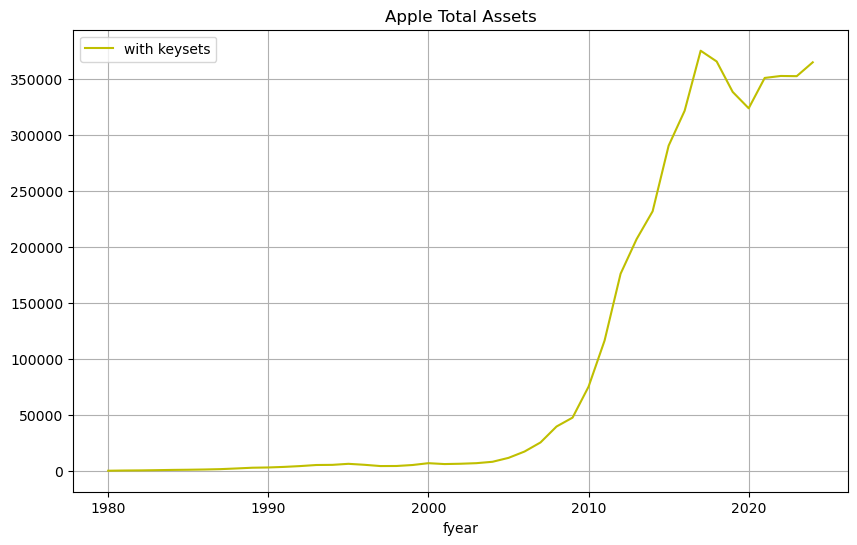

In [9]:
%matplotlib inline
# compa2.set_index('fyear')['at'].plot(title='Apple Total Assets',label='without keysets',linestyle='--',color = 'k', grid=True)
compa3.set_index('fyear')['at'].plot(title='Apple Total Assets',label='with keysets', color = 'y',grid=True)
plt.legend()